In [ ]:
# !pip install pyshbundle==0.0.3.1

In [ ]:
# !pip uninstall pyshbundle -y

In [2]:
import pyshbundle
import pandas as pd
import os
import xarray as xr

In [23]:
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/media/abhishek/DATA/open_source/pyshbundle/notebooks'

In [3]:
help(pyshbundle)

Help on package pyshbundle:

NAME
    pyshbundle - Top-level package for pyshbundle.

PACKAGE CONTENTS
    GRACE_Data_Driven_Correction_Vishwakarma
    GRACEconstants
    GRACEpy
    Phase_calc
    basin_avg
    clm2cs
    clm2sc
    cs2sc
    eigengrav
    gaussian
    grule
    gsha
    gshs
    iplm
    ispec
    klm2sc
    load_longterm_mean
    naninterp
    neumann
    normalklm
    plm
    plr
    pyshbundle
    read_GRACE_SH_paths
    reader_replacer
    reader_replacer_csr
    reader_replacer_itsg
    reader_replacer_jpl
    sc2cs
    statistical_downscaling_grids_TWS
    tws_cal

DATA
    __email__ = 'aminshk50@gmail.com'

VERSION
    0.0.1

AUTHOR
    Amin Shakya

FILE
    /home/abhishek/anaconda3/envs/pyshbundle/lib/python3.11/site-packages/pyshbundle/__init__.py




In [4]:
import pyshbundle.reader_replacer_jpl
import pyshbundle.read_GRACE_SH_paths
import pyshbundle.clm2sc
import pyshbundle.klm2sc
import pyshbundle.tws_cal
import pyshbundle.basin_avg

In [5]:
help(pyshbundle.read_GRACE_SH_paths)

Help on module pyshbundle.read_GRACE_SH_paths in pyshbundle:

NAME
    pyshbundle.read_GRACE_SH_paths

DESCRIPTION
    Created on Fri Feb  17 2023
    @author: Amin Shakya
    
    The purpose of this script is to,
        firstly read what the data source is (JPL, CSR or ITSG)
        read file path for GRACE L2 spherical harmonics inputs,
        read replacement files for tn13 and tn14
        source of the SH files (JPL, ITSG or CSR)
    The code returns path of data files, path of tn13 and path of tn14 replacement files

FUNCTIONS
    read_GRACE_SH_paths(use_sample_files=0)

FILE
    /home/abhishek/anaconda3/envs/pyshbundle/lib/python3.11/site-packages/pyshbundle/read_GRACE_SH_paths.py




#   MASTER
## Welcome to mat2py tool. This applies SH to process GRACE SH coefficients into Terrestrial water storage changes
#### Kindly provide the paths to respective files and outputs
#### 1. Reading SH coeffs from NASA JPL and replacing degree 1,2,3 coeffs'

In [5]:
import numpy as np
import pkg_resources

/mnt/Data/5hk/Data/Vivek/JPL_input<br>
/mnt/Data/5hk/Data/Vivek/JPL_TN_files/TN-13_GEOC_JPL_RL06.txt<br>
/mnt/Data/5hk/Data/Vivek/JPL_TN_files/TN-14_C30_C20_GSFC_SLR.txt

In [6]:
use_sample_files = 0
path_sh, path_tn13, path_tn14, source = pyshbundle.read_GRACE_SH_paths.read_GRACE_SH_paths(use_sample_files = use_sample_files)

This program supports working with GRACE L2 Spherical harmonics data from the following centers: CSR, JPL and ITSG
Instructions to download data may be referred to in https://github.com/mn5hk/pyshbundle/blob/main/docs/index.md#how-to-download-data
Successfully loaded TN13 and TN14 replacement files for JPL


In [7]:
sh_clm, dates_start, dates_end, no_of_files = pyshbundle.reader_replacer_jpl.reader_replacer_jpl(path_sh, path_tn14, path_tn13)

JPL
Reading into clm format complete!
Number of files read: 201
Starting replacement
found: 37
2002-04-04 2002-04-04 0
2002-05-02 2002-05-02 1
2002-08-01 2002-08-01 2
2002-09-01 2002-09-01 3
2002-10-01 2002-10-01 4
2002-11-01 2002-11-01 5
2002-12-01 2002-12-01 6
2003-01-01 2003-01-01 7
2003-02-01 2003-02-01 8
2003-03-01 2003-03-01 9
2003-04-01 2003-04-01 10
2003-05-01 2003-05-01 11
2003-07-01 2003-07-01 12
2003-08-01 2003-08-01 13
2003-09-01 2003-09-01 14
2003-10-01 2003-10-01 15
2003-11-01 2003-11-01 16
2003-12-01 2003-12-01 17
2004-01-01 2004-01-01 18
2004-02-04 2004-02-04 19
2004-03-01 2004-03-01 20
2004-04-01 2004-04-01 21
2004-05-01 2004-05-01 22
2004-06-01 2004-06-01 23
2004-11-01 2004-11-01 28
2004-12-01 2004-12-01 29
2005-01-01 2005-01-01 30
2005-02-01 2005-02-01 31
2005-03-01 2005-03-01 32
2005-04-01 2005-04-01 33
2005-05-01 2005-05-01 34
2005-06-01 2005-06-01 35
2005-07-01 2005-07-01 36
2005-08-01 2005-08-01 37
2005-09-01 2005-09-01 38
2005-10-01 2005-10-01 39
2005-11-01 2005

In [13]:
len(sh_clm[0][0])

33271

In [14]:
sh_clm[0][0][0:6]

[0.0, 1, 1, 2, 2, 2]

* `sh_clm` is a ndarray containg lists of data: degree;  order; clm; slm; delta clm; delta slm; start data; end date*

#### 2. The following cells perform a bunch of operations

* Storing SH coeffs in clm format into SC format
* Calculation of delta clm & delta slm
* Application of Gaussian filter/filter of user choice
* Application of filter to delta clm, slm to get filtered SH coeffs
* Calling gshs() with filtered SH coeffs to obtain TWS fields
* Flipping the TWS fields to get 0 degree longitude in the middle
* Saving data in netCDF4 format and writing to disk

In [8]:
if source == 'jpl':
    raw_sc = pyshbundle.clm2sc.clm2sc(sh_clm);
elif source == 'csr':
    raw_sc = pyshbundle.klm2sc.klm2sc(sh_clm);
elif source== 'itsg':
    raw_sc = pyshbundle.clm2scclm2sc(sh_clm);

Conversion into clm format complete


In [9]:
lmax = 96
gs = 3
half_rad_gf = 500

In [10]:
print('Kindly enter the following parameters based on your application')
lmax = int(input("Enter lmax: "))
gs = float(input("Enter grid size: "))
half_rad_gf = int(input("Enter half radius of Gaussian filter: "))
print("lmax , grid size & half raduius of gaussian filter are : ", lmax ,", " , gs,", ",half_rad_gf)

Kindly enter the following parameters based on your application
lmax , grid size & half raduius of gaussian filter are :  96 ,  3.0 ,  500


In [11]:
lon = np.arange(-180,180,gs)
lat = np.arange(89,-91,-gs)
# dates = pd.to_datetime(pd.Series(dates_start), format='%Y-%m-%d').dt.strftime('%d-%m-%Y') \
#         + "    " \
#         +pd.to_datetime(pd.Series(dates_end), format='%Y-%m-%d').dt.strftime('%d-%m-%Y')
dates = pd.to_datetime(pd.Series(dates_start), format='%Y-%m-%d')#.dt.strftime('%d-%m-%Y')
print('dates read! \n')

dates read! 



##### Remove long term mean to get anomalies
* Long term mean is calculated from NASA JPL SH coeffs in the period 01-01-2005 & 31-12-2010 (6 years continuous)

/media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/long_mean/SH_long_mean_jpl.npy

In [17]:
long_mean = input("Enter path to long term mean data in .npy format")
if source== 'jpl':
    SH_long_mean_jpl = np.load(long_mean)    # load the long term mean SH coeffs---> JPL 
    delta_sc = raw_sc - SH_long_mean_jpl
elif source== 'csr':
    SH_long_mean_csr = np.load(long_mean)    # load the long term mean SH coeffs---> CSR
    delta_sc = raw_sc - SH_long_mean_csr
elif source== 'itsg':
    SH_long_mean_itsg = np.load(long_mean)    # load the long term mean SH coeffs---> ITSG
    delta_sc = raw_sc - SH_long_mean_itsg

In [18]:
long_mean_jpl = '/media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/long_mean/SH_long_mean_jpl.npy'
SH_long_mean_jpl = np.load(long_mean_jpl)

In [20]:
raw_sc.shape

(201, 97, 193)

In [18]:
no_of_files

201

100%|██████████| 201/201 [00:16<00:00, 12.54it/s]


CPU times: user 15.6 s, sys: 472 ms, total: 16.1 s
Wall time: 18.5 s


/home/abhishek/anaconda3/envs/pyshbundle/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Casting input data from float128 to float64 for imshow.
  func(*args, **kwargs)
/home/abhishek/anaconda3/envs/pyshbundle/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


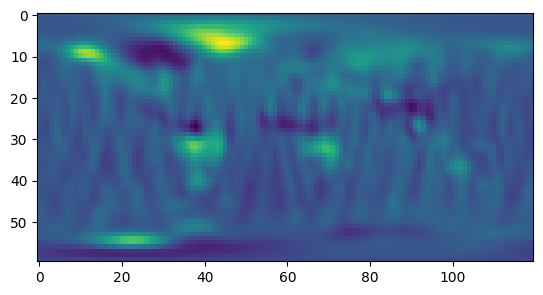

In [19]:
%%time
tws_fields = pyshbundle.tws_cal.tws_cal(delta_sc,lmax,gs,half_rad_gf,no_of_files)
tws_fields = np.float32(tws_fields)

In [20]:
lons = np.arange(-180, 180, gs)
lats = np.arange(-90, 90, gs)
x, y = np.meshgrid(lons, lats)

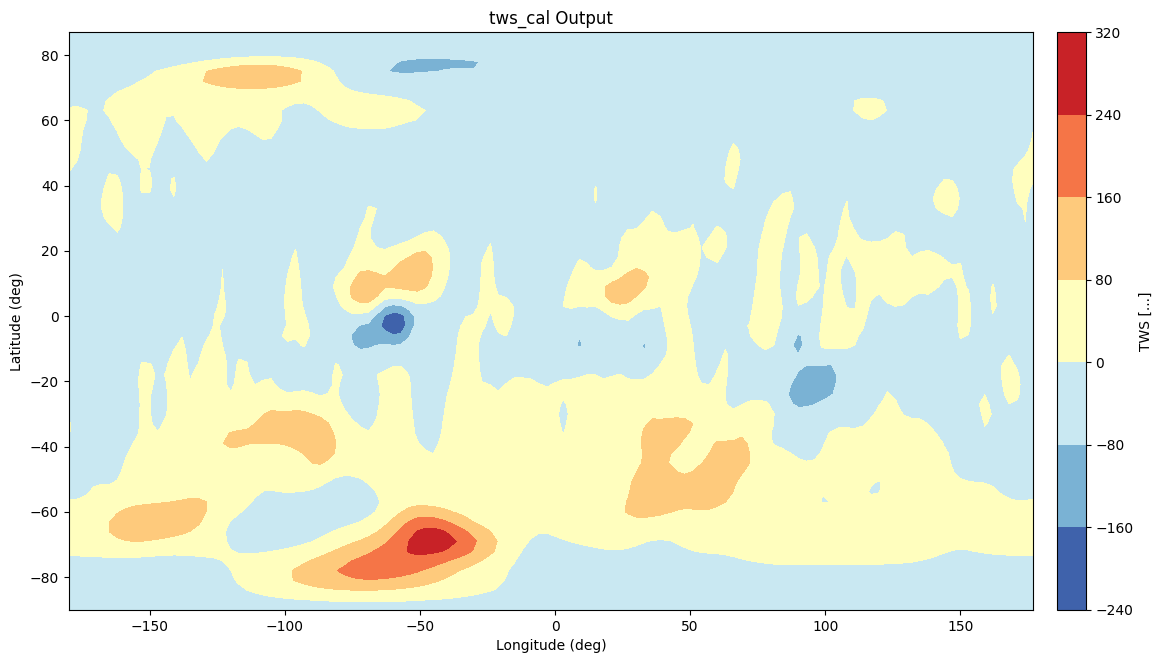

In [45]:
# Plotting and Visualization

fig = plt.figure(figsize=(15, 7.5))

# plot the data
max_level = 320
min_level = -240
step_level = 25

im = plt.contourf(x, y, tws_fields[27, :, :], cmap='RdYlBu_r', levels = np.arange(min_level, max_level + step_level, step_level))
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")

plt.colorbar(shrink=1.0, orientation='vertical', pad=0.02,label=f"TWS [...]")

plt.title(f"tws_cal Output")

plt.show()

In [20]:
ds = xr.Dataset(
    data_vars=dict(
        tws=(["time","lat", "lon"], tws_fields)
    ),
    coords = {
        "time":(('time'),dates),
        "lat":lat,
        "lon":lon },
    attrs=dict(description="TWS Anomaly corresponding to long term (2004-2010) mean \n lmax=96 and half radius of Gaussian filter = 500Km"),
)
ds

<xarray.Dataset>
Dimensions:  (time: 201, lat: 360, lon: 720)
Coordinates:
  * time     (time) datetime64[ns] 2002-04-04 2002-05-02 ... 2022-06-01
  * lat      (lat) float64 89.0 88.5 88.0 87.5 87.0 ... -89.0 -89.5 -90.0 -90.5
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
Data variables:
    tws      (time, lat, lon) float32 -1.011 -0.9978 -0.9847 ... 121.8 121.9
Attributes:
    description:  TWS Anomaly corresponding to long term (2004-2010) mean \n ...

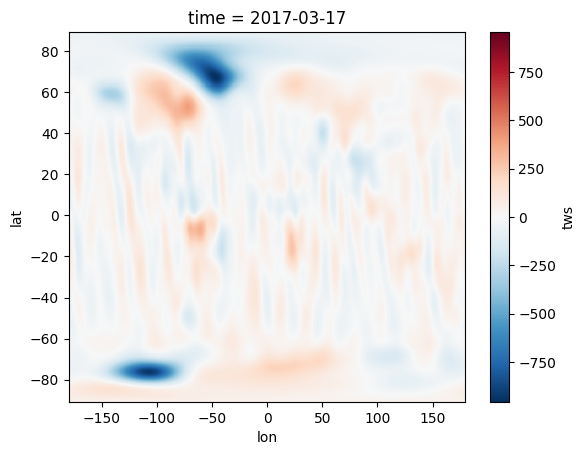

In [21]:
ds.tws.isel(time=150).plot()

In [22]:
ds.time.isel(time=114)

<xarray.DataArray 'time' ()>
array('2012-12-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2012-12-01

In [23]:
ds.to_netcdf('./output'+source+'_tws.nc', engine="netcdf4")

## Basin average

Krishna basin - /home/abhishek/Desktop/krishna_basefile/krishna_basin.shp 

Ganga basin - 

Amazon basin - 
wgs84

Do you want to calculate basin average?(y/n):y
Enter path for the shapefile:/mnt/Data/5hk/GIS/shp/basins/basin_india1.shp
Enter projected reference system:wgs84


/home/bramha/anaconda3/envs/pyshbundle0030/lib/python3.11/site-packages/pyshbundle/basin_avg.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shdf_area = sum(shdf.to_crs(c_rs).area)


Area of basin in km2: 2.1832582083983055e-05
Warning basin too small for GRACE data application


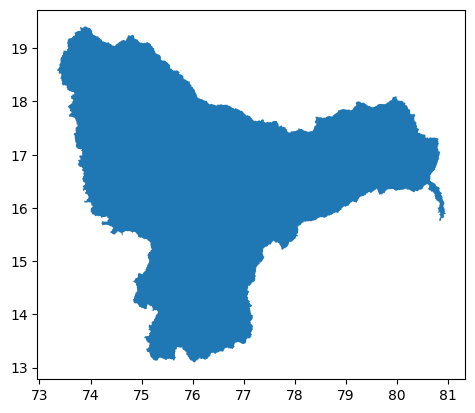

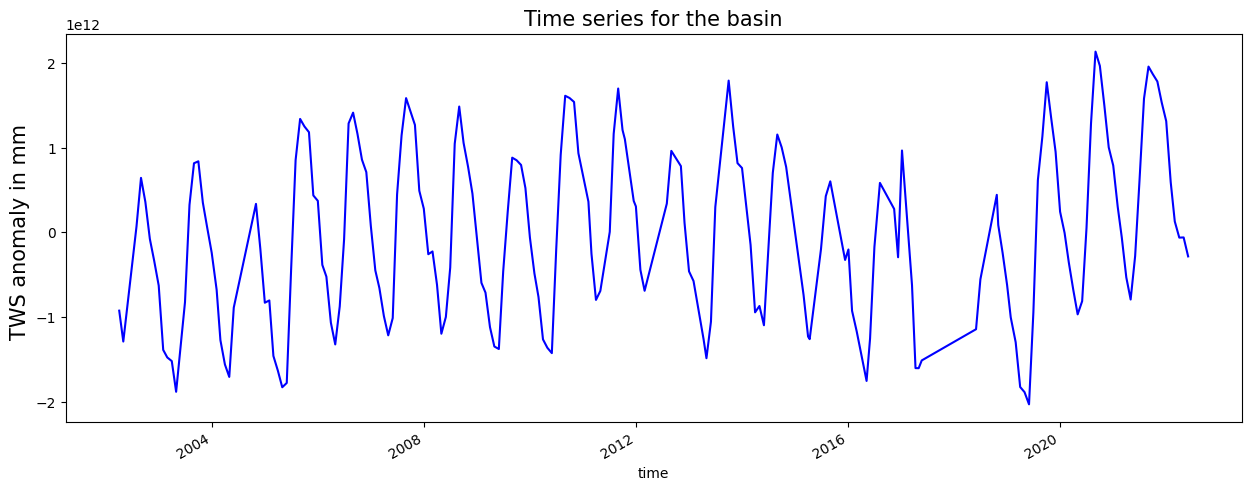

In [24]:
ans = str(input('Do you want to calculate basin average?(y/n):'))
if ans == 'y':
    path_shapefile = input("Enter path for the shapefile:")
    c_rs = str(input('Enter projected reference system:'))
    tws_basin_avg = pyshbundle.basin_avg.basin_avg(ds,path_shapefile, c_rs, no_of_files, gs)
else:
    pass